# Dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams["figure.figsize"] = (8,6)

## 데이터 현황파악 script

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
pd.DataFrame({'자료 내용(contents)':{col:df[col].unique() for col in df},
              '데이터형태(dtypes)':{col:df[col].dtype for col in df},
              '고유값 수(nunique)':{col:len(df[col].unique()) for col in df},
              '결측치 비율(%)':{col:str(round(sum(df[col].isna())/len(df),2))+'%' for col in df},
              '중복건수':{col:sum(df[col].duplicated()) for col in df},
              'nan 비율':{col:int(df[df[col] == 'nan'].shape[0]/len(df)*100) for col in df}
             })

,자료 내용(contents),데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,nan 비율
CRIM,"[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829, 0.14455, 0.21124, 0.17004, 0.22489, 0.11747, 0.09378, 0.62976, 0.63796, 0.62739, 1.05393, 0.7842, 0.80271, 0.7258, 1.25179, 0.85204, 1.23247, 0.98843, 0.75026, 0.84054, 0.67191, 0.95577, 0.77299, 1.00245, 1.13081, 1.35472, 1.38799, 1.15172, 1.61282, 0.06417, 0.09744, 0.08014, 0.17505, 0.02763, 0.03359, 0.12744, 0.1415, 0.15936, 0.12269, 0.17142, 0.18836, 0.22927, 0.25387, 0.21977, 0.08873, 0.04337, 0.0536, 0.04981, 0.0136, 0.01311, 0.02055, 0.01432, 0.15445, 0.10328, 0.14932, 0.17171, 0.11027, 0.1265, 0.01951, 0.03584, 0.04379, 0.05789, 0.13554, 0.12816, 0.08826, 0.15876, 0.09164, 0.19539, 0.07896, 0.09512, 0.10153, 0.08707, 0.05646, 0.08387, 0.04113, 0.04462, 0.03659, 0.03551, 0.05059, 0.05735, 0.05188, 0.07151, 0.0566, 0.05302, 0.04684, 0.03932, 0.04203, 0.02875, 0.04294, 0.12204, 0.11504, 0.12083, 0.08187, 0.0686, ...]",float64,504,0.0%,2,0
ZN,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100.0, 25.0, 17.5, 80.0, 28.0, 45.0, 60.0, 95.0, 82.5, 30.0, 22.0, 20.0, 40.0, 55.0, 52.5, 70.0, 34.0, 33.0, 35.0]",float64,26,0.0%,480,0
INDUS,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6.91, 5.64, 4.0, 1.22, 0.74, 1.32, 5.13, 1.38, 3.37, 6.07, 10.81, 12.83, 4.86, 4.49, 3.41, 15.04, 2.89, 8.56, 10.01, 25.65, 21.89, 19.58, 4.05, 2.46, 3.44, 2.93, 0.46, 1.52, 1.47, 2.03, 2.68, 10.59, 13.89, 6.2, 4.93, 5.86, 3.64, 3.75, 3.97, 6.96, 6.41, 3.33, 1.21, 2.97, 2.25, 1.76, 5.32, 4.95, 13.92, 2.24, 6.09, 9.9, 7.38, 3.24, 6.06, 5.19, 1.89, 3.78, 4.39, 4.15, 2.01, 1.25, 1.69, 2.02, 1.91, 18.1, 27.74, 9.69, 11.93]",float64,76,0.0%,430,0
CHAS,"[0.0, 1.0]",float64,2,0.0%,504,0
NOX,"[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0.448, 0.439, 0.41, 0.403, 0.411, 0.453, 0.4161, 0.398, 0.409, 0.413, 0.437, 0.426, 0.449, 0.489, 0.464, 0.445, 0.52, 0.547, 0.581, 0.624, 0.871, 0.605, 0.51, 0.488, 0.401, 0.422, 0.404, 0.415, 0.55, 0.507, 0.504, 0.431, 0.392, 0.394, 0.647, 0.575, 0.447, 0.4429, 0.4, 0.389, 0.385, 0.405, 0.433, 0.472, 0.544, 0.493, 0.46, 0.4379, 0.515, 0.442, 0.518, 0.484, 0.429, 0.435, 0.77, 0.718, 0.631, 0.668, 0.671, 0.7, 0.693, 0.659, 0.597, 0.679, 0.614, 0.584, 0.713, 0.74, 0.655, 0.58, 0.532, 0.583, 0.609, 0.585, 0.573]",float64,81,0.0%,425,0
RM,"[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.012, 6.172, 5.631, 6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99, 5.456, 5.727, 5.57, 5.965, 6.142, 5.813, 5.924, 5.599, 6.047, 6.495, 6.674, 5.713, 6.072, 5.95, 5.701, 5.933, 5.841, 5.85, 5.966, 6.595, 7.024, 6.77, 6.169, 6.211, 6.069, 5.682, 5.786, 6.03, 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29, 5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273, 6.286, 6.279, 6.14, 6.232, 5.874, 6.727, 6.619, 6.302, 6.167, 6.389, 6.63, 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249, 6.625, 6.163, 8.069, 7.82, 7.416, 6.781, 6.137, 5.851, 5.836, 6.127, ...]",float64,446,0.0%,60,0
AGE,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 94.3, 82.9, 39.0, 61.8, 84.5, 56.5, 29.3, 81.7, 36.6, 69.5, 98.1, 89.2, 91.7, 94.1, 85.7, 90.3, 88.8, 94.4, 87.3, 82.0, 95.0, 96.9, 68.2, 61.4, 41.5, 30.2, 21.8, 15.8, 2.9, 6.6, 6.5, 40.0, 33.8, 33.3, 85.5, 95.3, 62.0, 45.7, 63.0, 21.1, 21.4, 47.6, 21.9, 35.7, 40.5, 29.2, 47.2, 66.2, 93.4, 67.8, 43.4, 59.5, 17.8, 31.1, 36.8, 33.0, 17.5, 7.8, 6.2, 6.0, 45.0, 74.5, 53.7, 33.5, 70.4, 32.2, 46.7, 48.0, 56.1, 45.1, 56.8, 86.3, 63.1, 66.1, 73.9, 53.6, 28.9, 77.3, 57.8, 69.6, 76.0, 36.9, 62.5, 79.9, 71.3, 85.4, 87.4, 90.0, 96.7, 91.9, ...]",float64,356,0.0%,150,0
DIS,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821, 6.5921, 6.3467, 6.2267, 5.4509, 4.7075, 4.4619, 4.4986, 4.2579, 3.7965, 3.7979, 4.0123, 3.9769, 4.0952, 4.3996, 4.4546, 4.682, 4.4534, 4.4547, 4.239, 4.233, 4.175, 3.99, 3.7872, 3.7598, 3.3603, 3.3779, 3.9342, 3.8473, 5.4011, 5.7209, 5.1004, 5.6894, 5.87, 6.0877, 6.8147, 7.3197, 8.6966, 9.1876, 

## 1. Toy dataset

In [4]:
from sklearn import datasets
boston= datasets.load_boston()
boston.keys()

from sklearn.datasets import load_boston
boston= load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
boston.data[0:1]
boston.target[0:10]
print(boston.DESCR)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df['target']= boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2.	Real world datasets

In [7]:
from sklearn.datasets import fetch_20newsgroups
newsgroups= fetch_20newsgroups()
newsgroups.keys()

df= pd.DataFrame(newsgroups.data, columns=['contents'])
df['target']= newsgroups.target
df.head()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

,contents,target
0,"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",7
1,"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n",4
2,"From: twillis@ec.ecn.purdue.edu (Thomas E Willis)\nSubject: PB questions...\nOrganization: Purdue University Engineering Computer Network\nDistribution: usa\nLines: 36\n\nwell folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopefully) somebody can answer:\n\n* does anybody know any dirt on when the next round of powerbook\nintroductions are expected? i'd heard the 185c was supposed to make an\nappearence ""this summer"" but haven't heard anymore on it - and since i\ndon't have access to macleak, i was wondering if anybody out there had\nmore info...\n\n* has anybody heard rumors about price drops to the powerbook line like the\nones the duo's just went through recently?\n\n* what's the impression of the display on the 180? i could probably swing\na 180 if i got the 80Mb disk rather than the 120, but i don't really have\na feel for how much ""better"" the display is (yea, it looks great in the\nstore, but is that all ""wow"" or is it really that good?). could i solicit\nsome opinions of people who use the 160 and 180 day-to-day on if its worth\ntaking the disk size and money hit to get the active display? (i realize\nthis is a real subjective question, but i've only played around with the\nmachines in a computer store breifly and figured the opinions of somebody\nwho actually uses the machine daily might prove helpful).\n\n* how well does hellcats perform? ;)\n\nthanks a bunch in advance for any info - if you could email, i'll post a\nsummary (news reading time is at a premium with finals just around the\ncorner... :( )\n--\nTom Willis \ twillis@ecn.purdue.edu \ Purdue Electrical Engineering\n---------------------------------------------------------------------------\n""Convictions are more dangerous enemies of truth than lies."" - F. W.\nNietzsche\n",4
3,"From: jgreen@amber (Joe Green)\nSubject: Re: Weitek P9000 ?\nOrganization: Harris Computer Systems Division\nLines: 14\nDistribution: world\nNNTP-Posting-Host: amber.ssd.csd.harris.com\nX-Newsreader: TIN [version 1.1 PL9]\n\nRobert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> abraxis@iastate.edu writes in article <abraxis.73434015

In [8]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_train.keys()
newsgroups_train.target.shape
newsgroups_test = fetch_20newsgroups(subset='test')
newsgroups_test.target.shape

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

(11314,)

(7532,)

## 3. Open ML datasets

In [9]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='wine-quality-white')
data.url
data.keys()
df = pd.DataFrame(np.c_[data.data, data.target], columns= data.feature_names + ['target'])
df.head()

'https://www.openml.org/d/40498'

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,4
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,4
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,4
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,4
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,4


## 3.	Generated datasets

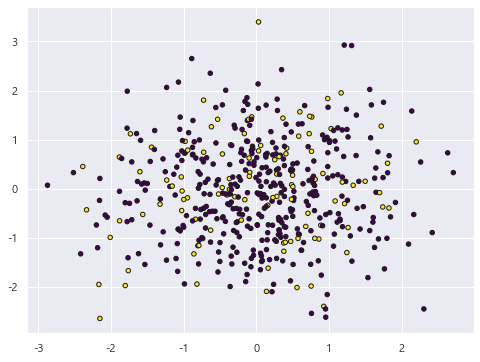

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_classes=2, weights=[0.8, 0.2],
                          random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='viridis', edgecolor='k')

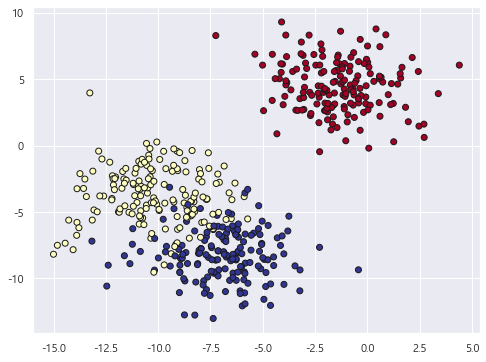

In [11]:
from sklearn.datasets import make_moons, make_circles, make_blobs
X, y = make_blobs(n_samples=500, centers=3, 
                  n_features=2, cluster_std=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='k')

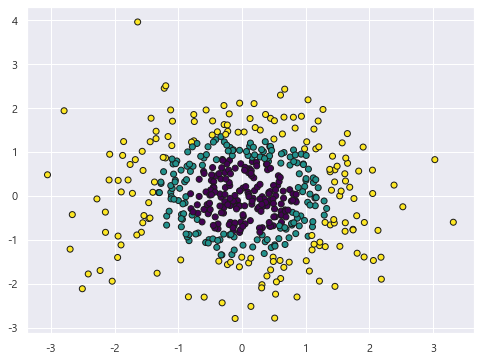

In [12]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')

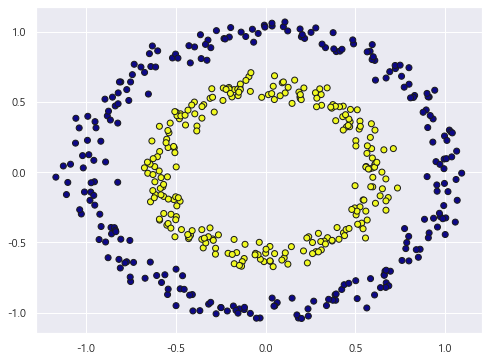

In [13]:
X, y = make_circles(n_samples=500, factor=.6, noise=.05)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolor='k')

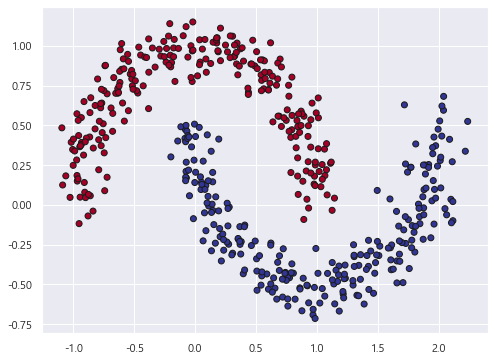

In [14]:
X, y = make_moons(n_samples=500, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='k')

In [15]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], target=y))
df.describe()

,x1,x2,target
count,500.000000,500.000000,500.000000
mean,0.503475,0.248211,0.500000
std,0.867369,0.503980,0.500501
min,-1.092733,-0.713839,0.000000
25%,-0.075540,-0.221892,0.000000
50%,0.508422,0.253480,0.500000
75%,1.083074,0.703703,1.000000
max,2.234569,1.149495,1.000000


## scikit learn overview

In [16]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(np.c_[data.data, data.target], columns= data.feature_names + ['target'])
df= df[['flavanoids','color_intensity', 'target']]
df.head()

,flavanoids,color_intensity,target
0,3.06,5.64,0.0
1,2.76,4.38,0.0
2,3.24,5.68,0.0
3,3.49,7.80,0.0
4,2.69,4.32,0.0


<AxesSubplot:xlabel='flavanoids', ylabel='color_intensity'>

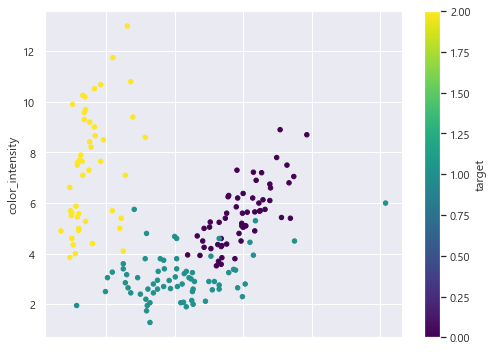

In [17]:
df.plot.scatter('flavanoids','color_intensity',c='target', cmap='viridis')

### 평균으로 예측하기

In [18]:
df.groupby('target').mean().round(2)
X = df.groupby('target').mean().values
y = df.target.unique()  # classes of each sample

,flavanoids,color_intensity
target,,
0.0,2.98,5.53
1.0,2.08,3.09
2.0,0.78,7.40


In [19]:
clf.predict([[3, 6]])

RandomForestClassifier(random_state=0)

array([0.])

0.8820224719101124

0.8820224719101124

### 전체 데이터로 예측하기

RandomForestClassifier(random_state=0)

1.0

# End